In [1]:
import pandas as pd
import json
import datetime
from dateutil.parser import parse
import re
import time
from matplotlib import pyplot as plt
import wordcloud,jieba
from PIL import Image
import collections
import numpy as np
from datetime import timezone,timedelta
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType


# 数据预处理

In [2]:
comp = re.compile('</?\w+[^>]*>')
def strip_html(s:str):
    return comp.sub('',s)

In [ ]:
df = pd.read_csv('lwl_raw.csv')
floor_number_list = []
created_at_list = []
text_list = []
user_name_list = []
user_gender_list = []
user_avt_list = []
user_id_list = []
for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    floor_number_list.append(s_dict['floor_number'])
    if i%1000==0:
        print('{}/{}'.format(i+1,df.shape[0]))
        '''
    df['floor_number'][i]=s_dict['floor_number']
    df['created_at'][i]=s_dict['created_at']
    df['text'][i] = s_dict['text']
    df['user_name'][i] = s_dict['user']['screen_name']
    df['user_gender'][i] = s_dict['user']['gender']
    df['user_avt'][i] = s_dict['user']['profile_image_url']
    df['user_id'][i] = s_dict['user']['profile_url'].split('=')[-1]
    if i%1000==0:
        print('1-{}/{}'.format(i+1,df.shape[0]))
        '''
df['floor_nuumber']=floor_number_list
del floor_number_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    created_at_list.append(s_dict['created_at'])
    if i%1000==0:
        print('2-{}/{}'.format(i+1,df.shape[0]))
df['created_at'] = created_at_list
del created_at_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    text_list.append(s_dict['text'])
    if i%1000==0:
        print('3-{}/{}'.format(i+1,df.shape[0]))
df['text'] = text_list
del text_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_name_list.append(s_dict['user']['screen_name'])
    if i%1000==0:
        print('4-{}/{}'.format(i+1,df.shape[0]))
df['user_name'] = user_name_list
del user_name_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_gender_list.append(s_dict['user']['gender'])
    if i%1000==0:
        print('5-{}/{}'.format(i+1,df.shape[0]))
df['user_gender'] = user_gender_list
del user_gender_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_avt_list.append(s_dict['user']['profile_image_url'])
    if i%1000==0:
        print('6-{}/{}'.format(i+1,df.shape[0]))
df['user_avt'] = user_avt_list
del user_avt_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_id_list.append(s_dict['user']['profile_url'].split('=')[-1])
    if i%1000==0:
        print('7-{}/{}'.format(i+1,df.shape[0]))
df['user_id'] = user_id_list
del user_id_list

In [3]:
df_raw = pd.read_csv('lwl_raw.csv')

In [6]:
df_raw.columns[0]
df = df_raw.drop(df_raw.columns[[0,1,2]],axis=1)

In [8]:
df.sort_values(by="floor_nuumber",ascending=True,inplace=True)

In [11]:
print(df.shape)
df_drop = df.drop_duplicates(subset=['floor_nuumber'],keep='first',inplace=False)
print(df_drop.shape)

(899988, 7)
(836689, 7)


In [20]:
df_drop.head()
df_drop.drop(index=(df_drop.loc[(df_drop['floor_nuumber']==0)].index),inplace=True)

In [24]:
df_drop.head()
df_drop.tail()

,floor_nuumber,created_at,text,user_name,user_gender,user_avt,user_id
858829,953461,Sun Jun 21 12:23:22 +0800 2020,亮亮，节日快乐,网个红,m,https://tvax4.sinaimg.cn/crop.0.0.996.996.180/...,6036716472
858828,953462,Sun Jun 21 12:23:27 +0800 2020,李医生父亲节快乐🎉,人生不过是一个轮回,f,https://tvax4.sinaimg.cn/crop.0.0.512.512.180/...,5106420671
858827,953463,Sun Jun 21 12:23:31 +0800 2020,以前的评论看不见了？哎……消灭吐槽的声音就＝消灭了负能量。,天津地产老炮,m,https://tvax1.sinaimg.cn/default/images/defaul...,1681365414
858826,953464,Sun Jun 21 12:23:44 +0800 2020,宋木山：你体内负能量太多啦,蓝玛飞蓬,f,https://tvax1.sinaimg.cn/default/images/defaul...,7056348723
858825,953465,Sun Jun 21 12:24:30 +0800 2020,父亲节快乐！,哈哈陈,m,https://tva3.sinaimg.cn/crop.0.0.180.180.180/5...,1416936310


In [22]:
df_drop.to_csv('lwl-clean.csv',index=False,encoding="utf_8_sig")

In [25]:
del df
df = df_drop

In [78]:
df = pd.read_csv('lwl-user-clean-2-small-location-sorted.csv')

# 数据分析
--- 

## 概览
----

### 男女比

In [34]:
m = df.loc[(df['user_gender']=='m')].shape[0]
f = df.loc[(df['user_gender']=='f')].shape[0]
print(m,f)

310782 525905


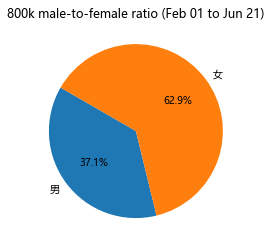

In [52]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
labels = ['男','女']
sizes = (m,f)
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title('800k male-to-female ratio (Feb 01 to Jun 21)')
plt.savefig('./img/mf-ratio-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

----
### 词频与词云

In [37]:
text_col = df['text']
print(text_col.shape)
cut_text = []
for i,text in enumerate(text_col):
    if i%100000==0:
        print('-',end='')
    cut_text.append(jieba.lcut(strip_html(text)))
print(cut_text[2])

(836687,)
---------[]


In [50]:
cut_col_list = [i for j in cut_text for i in j]
punctuation_marks = ['，',',','!','！','。','.','、','~','[',']','【','】',' ']
stop_words = open('stopwords.words','r',encoding='utf-8').read().split('\n')
cut_col_list_stripped = list(filter(lambda x:x not in punctuation_marks,cut_col_list))
cut_col_list_stripped_stopped = list(filter(lambda x:x not in stop_words,cut_col_list_stripped))
all_txt = " ".join(cut_col_list_stripped_stopped)

len(all_txt)

13467446

#### 词频

In [51]:
words_count = collections.Counter(cut_col_list_stripped_stopped)
words_count_top = words_count.most_common(20)
print(words_count_top)
print(len(cut_col_list_stripped_stopped))

[('好', 193393), ('蜡烛', 174030), ('李医生', 154063), ('走', 128026), ('🙏', 117412), ('一路', 86701), ('加油', 71668), ('都', 57842), ('早日康复', 56781), ('希望', 51391), ('？', 45452), ('不', 43294), ('英雄', 42028), ('人', 41093), ('会', 40369), ('…', 38515), ('晚安', 37079), ('还', 30526), ('很', 29640), ('说', 28134)]
4757136


c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128591 missing from current font.
  font.load_char(ord(s), flags=flags)


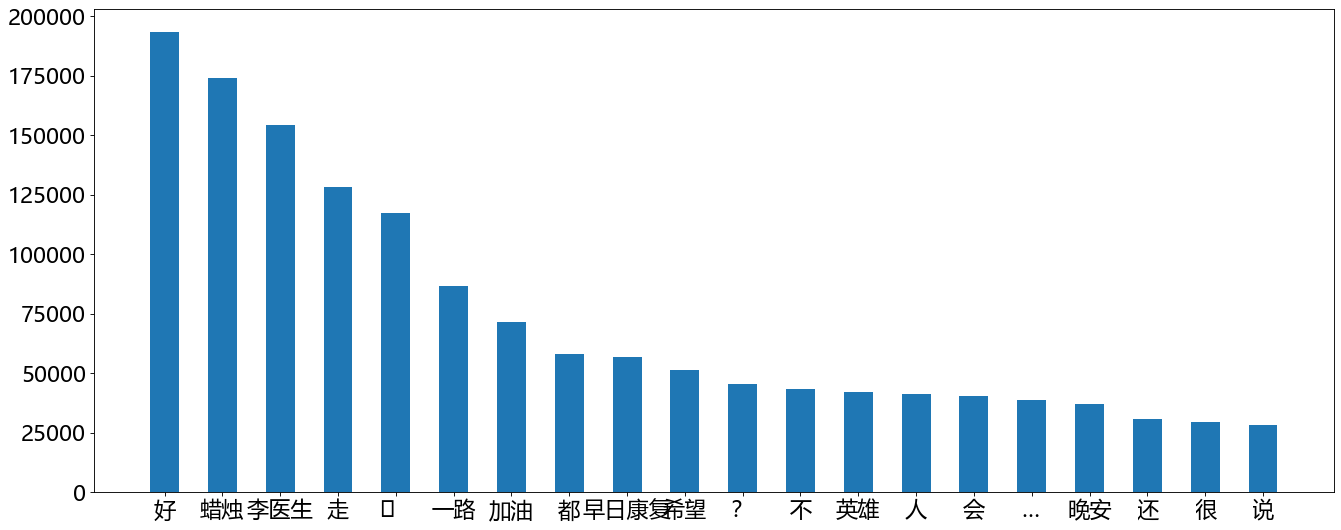

In [53]:
plt.figure(figsize=(20,8),dpi=80)
words = []
count = []
for (w,c) in words_count_top:
    words.append(w)
    count.append(c)
x = range(len(words))
plt.bar(x,count,width=0.5)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.xticks(x,words)
plt.tick_params(labelsize=20)
plt.savefig('./img/words-freq-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

#### 词云

In [54]:
w = wordcloud.WordCloud(\
    width = 1000, height = 700,\
    background_color = "white",     font_path = "msyh.ttc",scale=16,collocations=False
)


w.generate_from_text(all_txt)

In [55]:
w.to_file('./img/cloud-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png')

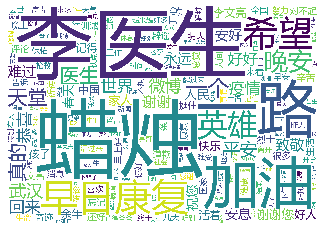

<Figure size 432x288 with 0 Axes>

In [56]:
plt.imshow(w)
plt.axis("off")
plt.figure()
plt.show()

----
## 详细内容

----
### 时间序列分析

#### 评论量——日期

In [58]:
dates = {}
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at']).date().strftime('%m-%d')
    if dates.get(d)==None:
        dates[d]=1
    else:
        dates[d]+=1

->->->->->->->->->

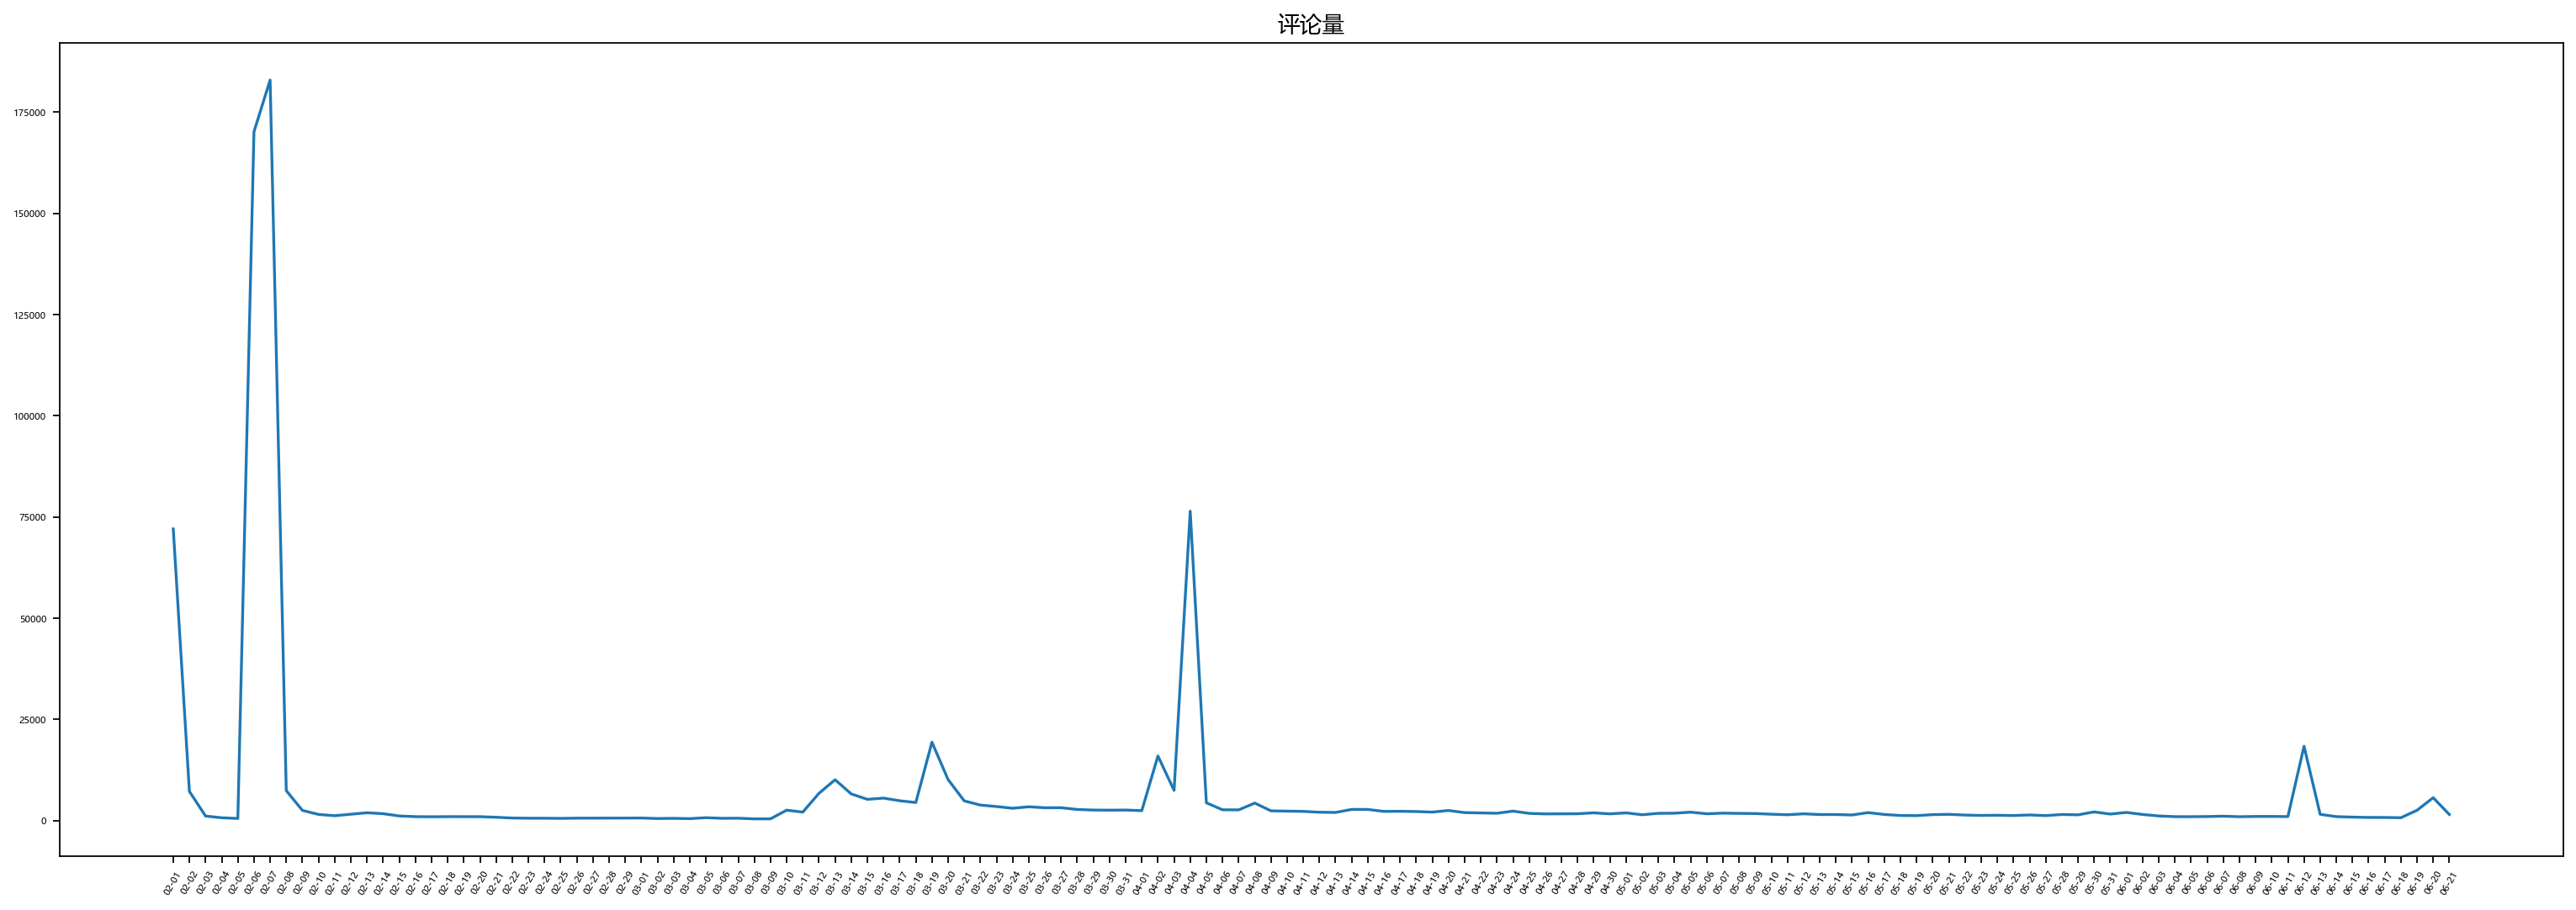

In [62]:
x_data = []
y_data = []
for k in dates:
    x_data.append(k)
    y_data.append(dates[k])
plt.figure(figsize=(24,8),dpi=160)
plt.plot(x_data,y_data)
plt.title('评论量')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./img/comment-count-daily-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

#### 评论男女比日期变化

In [67]:
dates = {}
m_total = 1
f_total = 1
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at']).date().strftime('%m-%d')
    if df.iloc[i]['user_gender']=='f':
        f_total +=1
    else:
        m_total+=1
    dates[d]=m_total/f_total

->->->->->->->->->

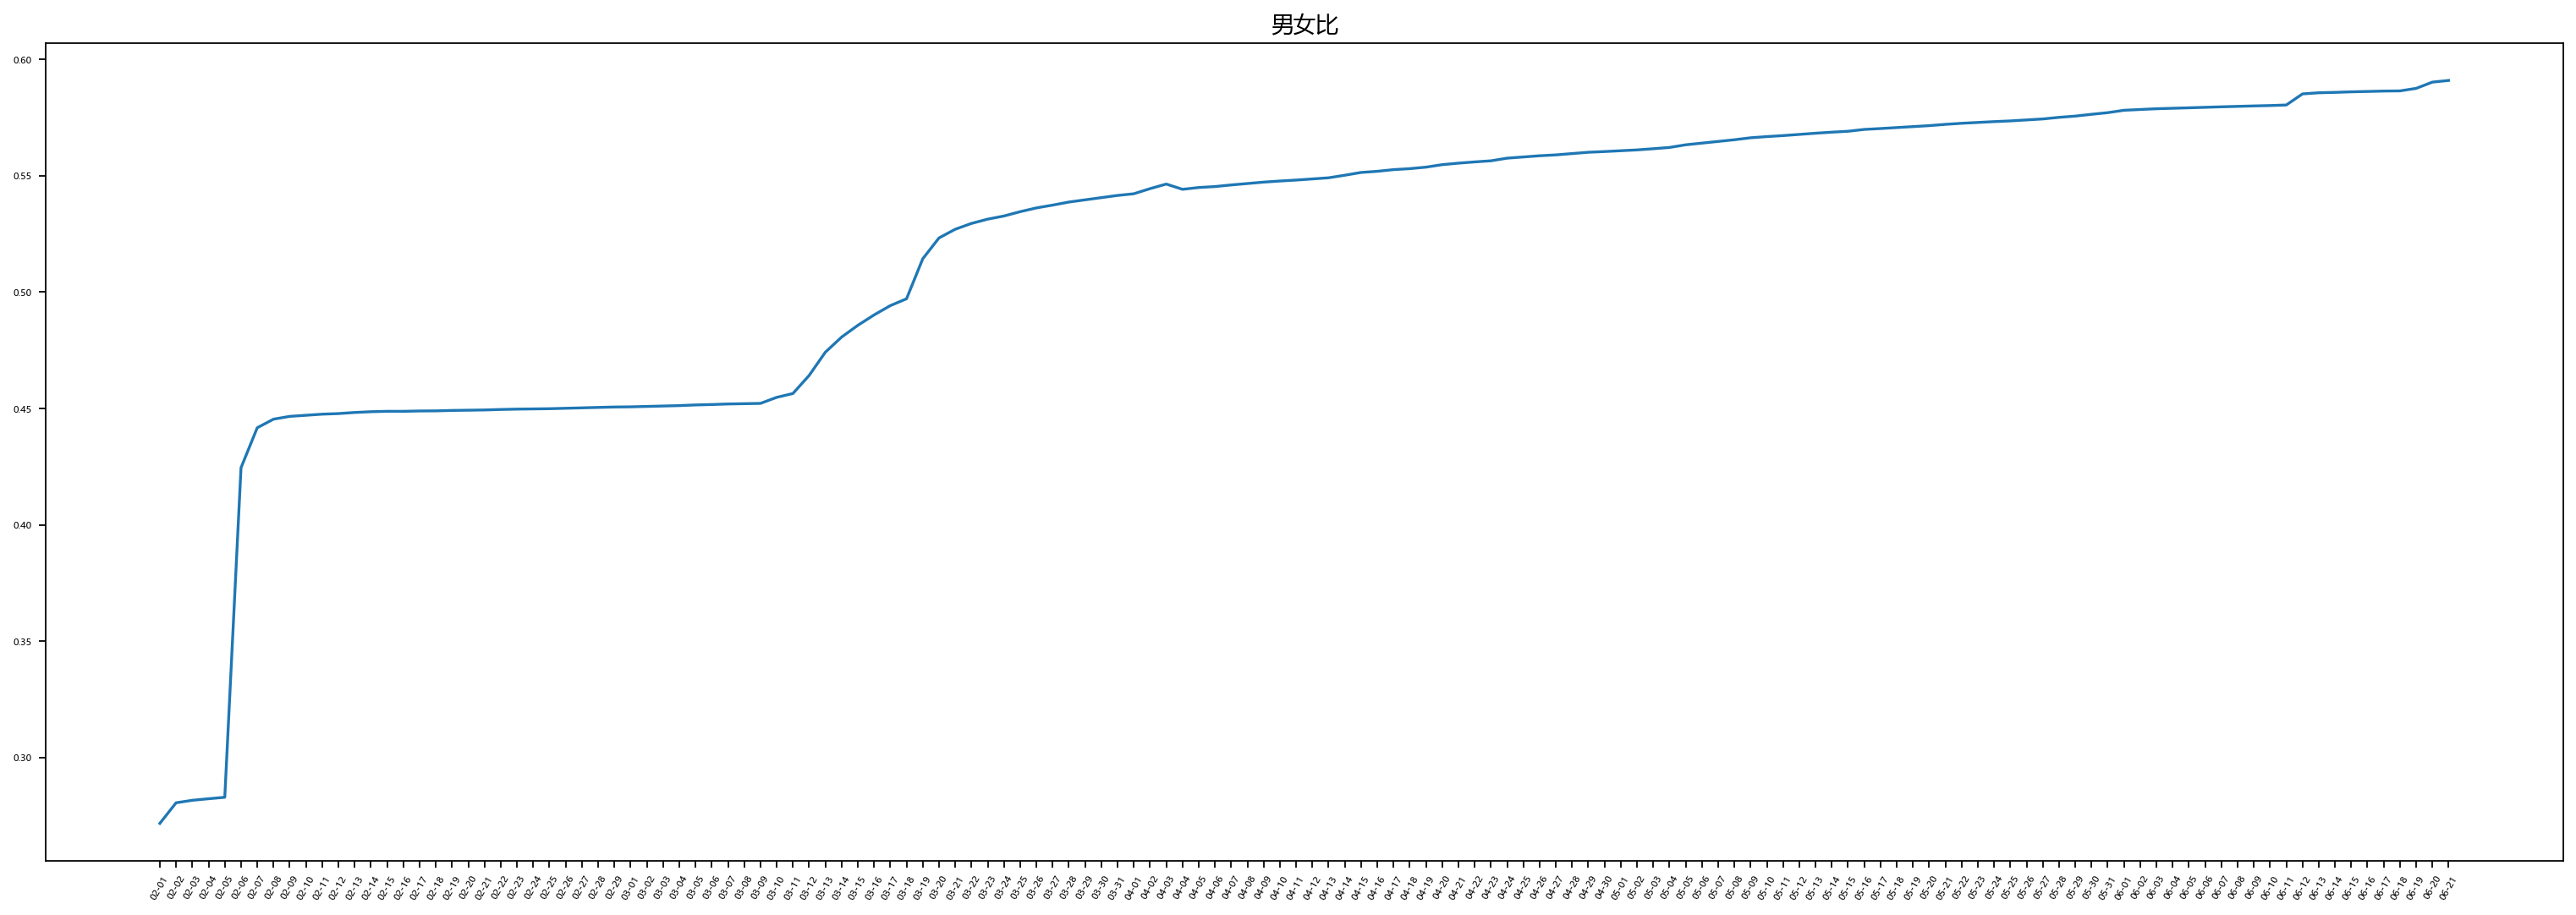

In [68]:
x_data = []
y_data = []
for k in dates:
    x_data.append(k)
    y_data.append(dates[k])
plt.figure(figsize=(24,8),dpi=160)
plt.plot(x_data,y_data)
plt.title('男女比')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./img/mf-ratio-daily-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

#### 评论&男女比小时变化

In [69]:
hours = {}
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at'])
    d = d +timedelta(hours=8)
    h_str = d.astimezone(timezone.utc).strftime('%H')
    if hours.get(h_str)==None:
        hours[h_str]={'m':1,'f':1,'m_total':1,'f_total':1}
    else:
        hours[h_str][df.iloc[i]['user_gender']]+=1
        hours[h_str][df.iloc[i]['user_gender']+'_total']+=1

->->->->->->->->->

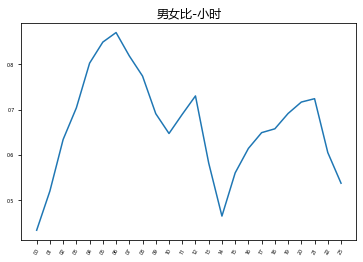

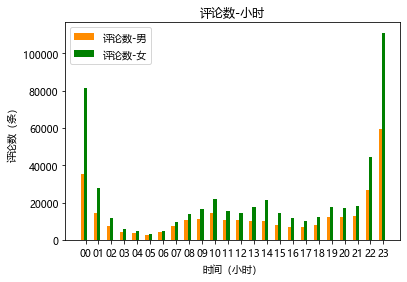

In [71]:
x_data = []
y_data = []
m_data = []
f_data = []
for k in hours:
    x_data.append(k)
    y_data.append(hours[k]['m']/hours[k]['f'])
    m_data.append(hours[k]['m_total'])
    f_data.append(hours[k]['f_total'])
'''
x_data.reverse()
y_data.reverse()
f_data.reverse()
m_data.reverse()
'''
index_0 = x_data.index('00')
x_data = x_data[index_0:]+x_data[0:index_0]
y_data = y_data[index_0:]+y_data[0:index_0]
f_data = f_data[index_0:]+f_data[0:index_0]
m_data = m_data[index_0:]+m_data[0:index_0]


plt.plot(x_data,y_data)
plt.title('男女比-小时')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./mf-ratio-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

width=0.25
index = np.arange(len(x_data))
plt.bar(index,m_data,width=width,label='评论数-男',color='darkorange')
plt.bar(index+width,f_data,width=width,label='评论数-女',color='green',tick_label=x_data)
plt.xticks()
plt.xlabel('时间（小时）')
plt.ylabel('评论数（条）')
plt.title('评论数-小时')
plt.legend()
plt.savefig('./img/mf-count-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

### 不同城市评论时间分布

In [82]:
cities_count = collections.Counter(df['location'])

In [103]:
cities_count_list = cities_count.most_common(21)

In [118]:
cities = []
for c in cities_count_list:
    if c[0]!='其他' and c[0]!='海外':
        cities.append(c[0])
print(cities[0:10])

['北京', '广东', '江苏', '上海', '湖北', '浙江', '山东', '四川', '河南', '福建']


In [129]:
hours_list = []
for city in cities[0:5]:
    cdf = df[df['location']==city]
    hours = {}
    for i in range(0,cdf.shape[0]):
        if i%1000==0:
            print('->',end='')
        d = parse(cdf.iloc[i]['created_at'])
        d = d +timedelta(hours=8)
        h_str = d.astimezone(timezone.utc).strftime('%H')
        if hours.get(h_str)==None:
            hours[h_str]=0
        else:
            hours[h_str]+=1
    x_data = []
    y_data = []
    for k in hours:
        x_data.append(k)
        y_data.append(hours[k])
    index_0 = x_data.index('00')
    x_data = x_data[index_0:]+x_data[0:index_0]
    y_data = y_data[index_0:]+y_data[0:index_0]
    hours_list.append({city:[x_data,y_data]})

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

In [130]:
for k in hours_list[0]:
    print(k,hours_list[0][k][0])

北京 ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


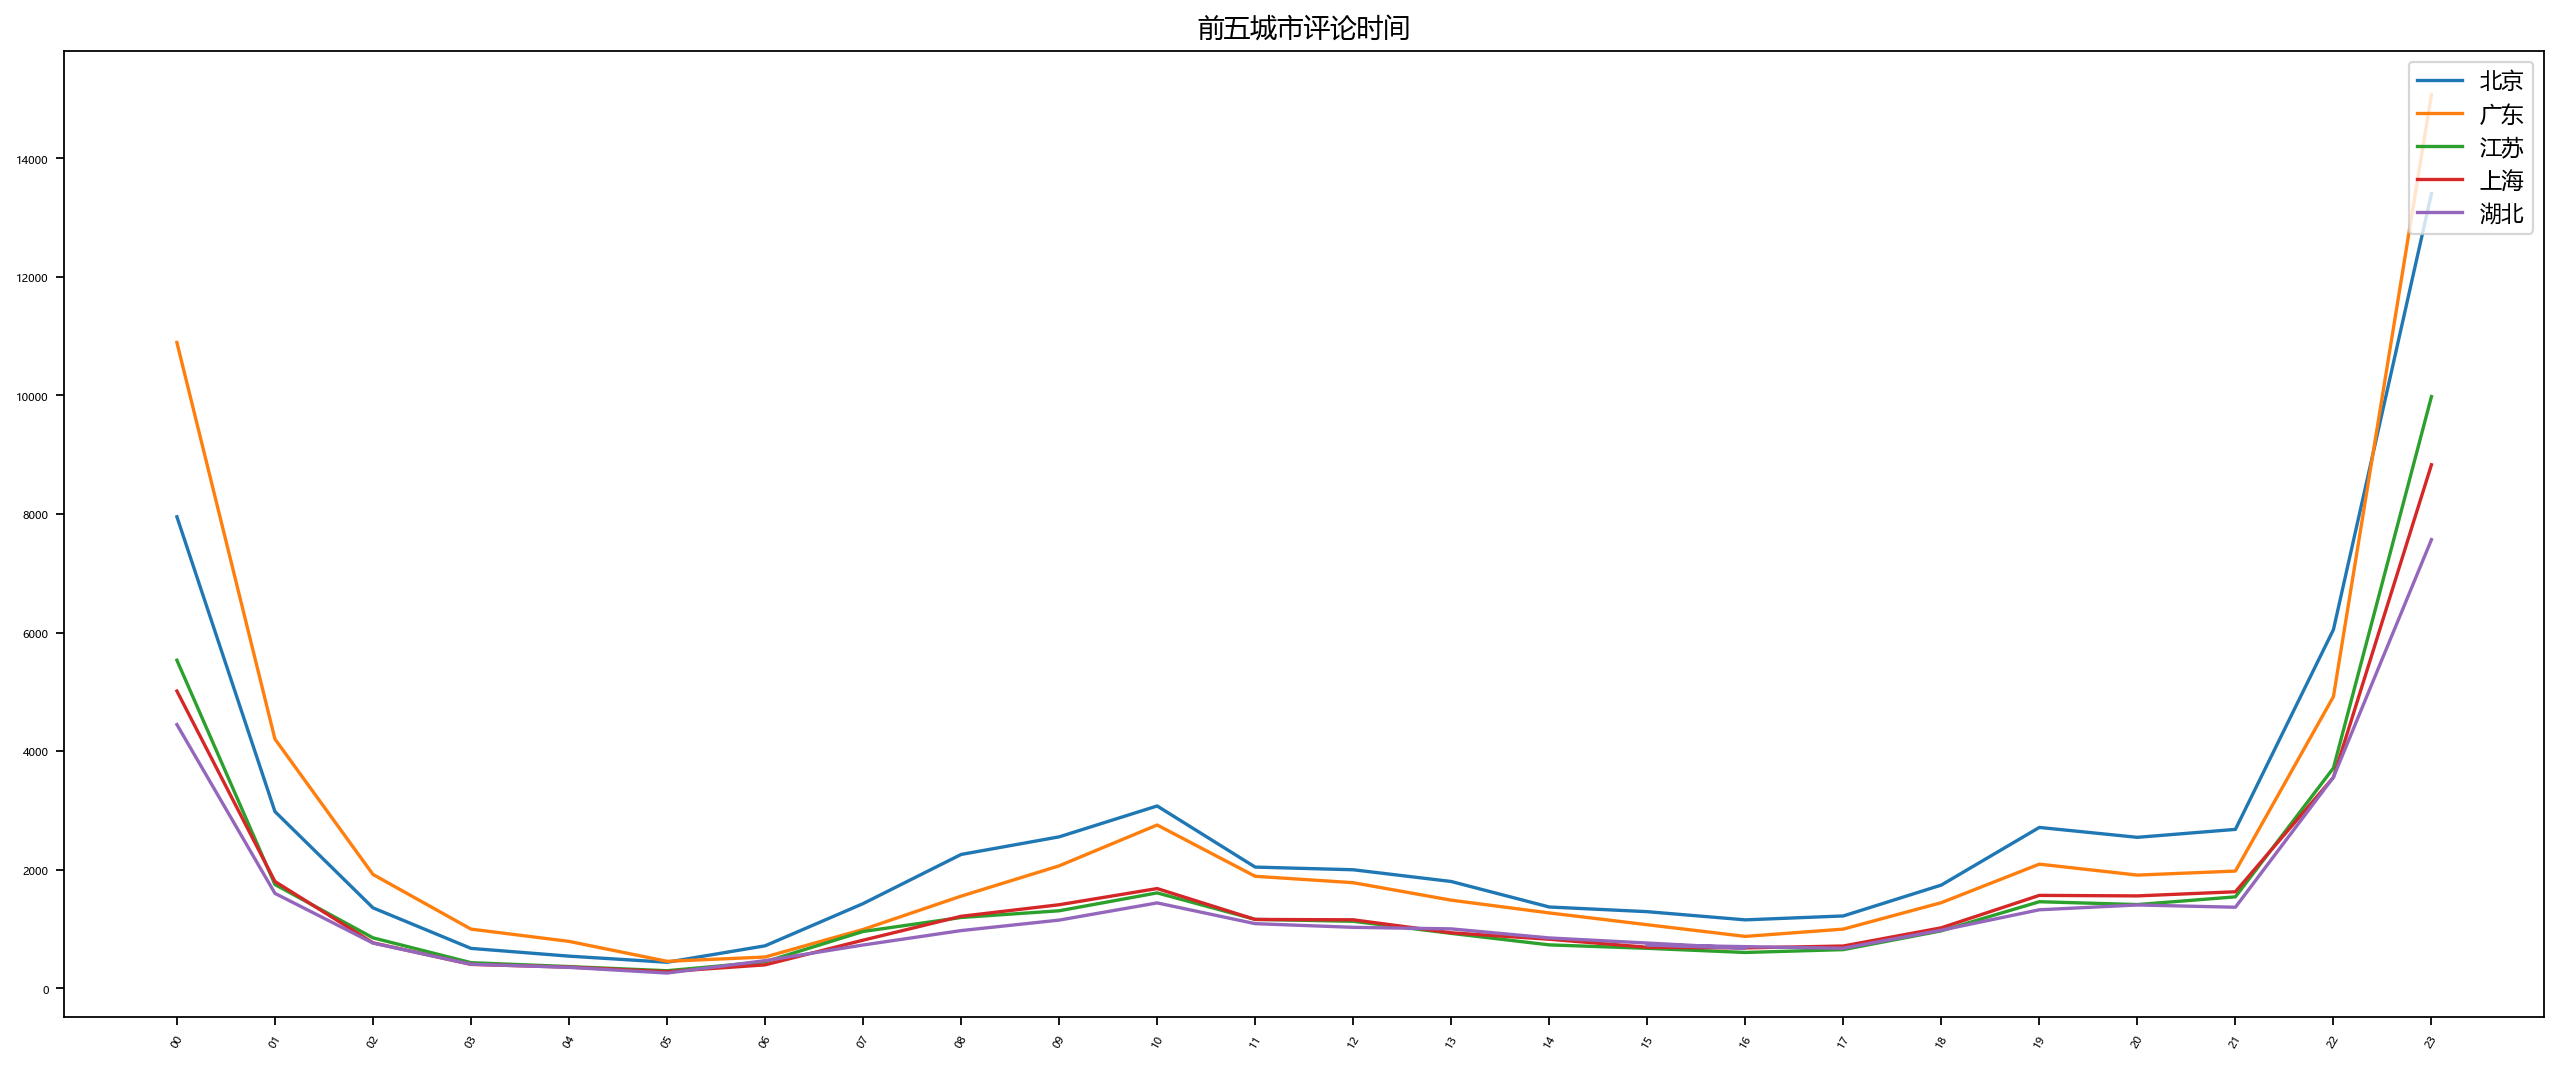

In [131]:
plt.figure(figsize=(20,8),dpi=160)
for ck in hours_list:
    for k in ck:
        plt.plot(ck[k][0],ck[k][1],label=k)
#plt.plot(x_data,y_data_m,color='r',label='男性')
plt.title('前五城市评论时间')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.legend(loc='upper right')
plt.savefig('./img/'+'top20'+'-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

In [114]:
def city_gender_hour_plot(city):
    #city = "上海"
    cdf = df[df['location']==city]
    cdf_m = cdf[cdf['user_gender']=='m']
    cdf_f = cdf[cdf['user_gender']=='f']
    hours_m = {}
    hours_f = {}
    for i in range(0,cdf_f.shape[0]):
        if i%1000==0:
            print('->',end='')
        d = parse(cdf_f.iloc[i]['created_at'])
        d = d +timedelta(hours=8)
        h_str = d.astimezone(timezone.utc).strftime('%H')
        if hours_f.get(h_str)==None:
            hours_f[h_str]=0
        else:
            hours_f[h_str]+=1
    for i in range(0,cdf_m.shape[0]):
        if i%1000==0:
            print('->',end='')
        d = parse(cdf_m.iloc[i]['created_at'])
        d = d +timedelta(hours=8)
        h_str = d.astimezone(timezone.utc).strftime('%H')
        if hours_m.get(h_str)==None:
            hours_m[h_str]=0
        else:
            hours_m[h_str]+=1
    x_data = []
    y_data_m = []
    y_data_f = []
    for k in hours_f:
        x_data.append(k)
        y_data_f.append(hours_f[k])
    for k in hours_m:
        y_data_m.append(hours_m[k])
    index_0 = x_data.index('00')
    x_data = x_data[index_0:]+x_data[0:index_0]
    y_data_f = y_data_f[index_0:]+y_data_f[0:index_0]
    y_data_m = y_data_m[index_0:]+y_data_m[0:index_0]
    plt.plot(x_data,y_data_f,label='女性')
    plt.plot(x_data,y_data_m,color='r',label='男性')
    plt.title(city+'-评论时间分析')
    plt.xticks(rotation=60)
    plt.tick_params(labelsize=5)
    plt.legend(loc='upper right')
    plt.savefig('./'+city+'-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
    plt.show()

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

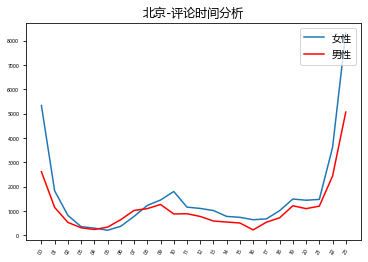

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

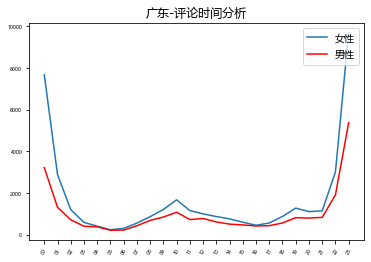

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

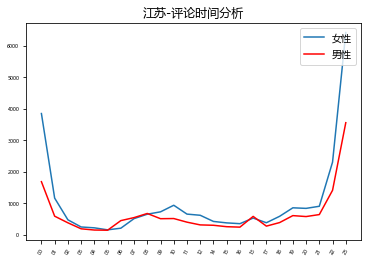

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

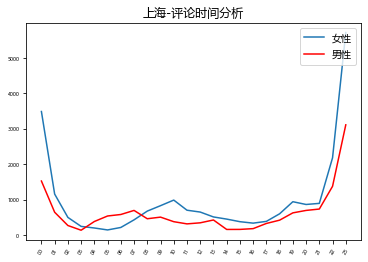

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

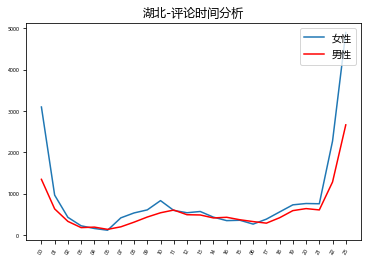

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

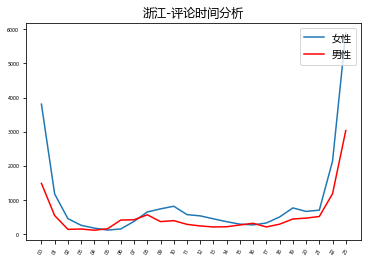

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

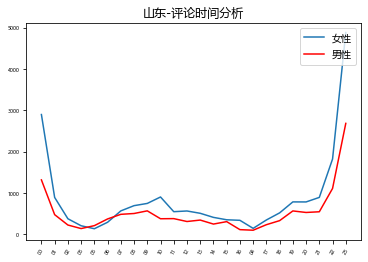

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

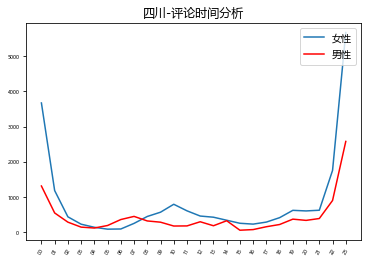

->->->->->->->->->->->->->->->->->->->->->->

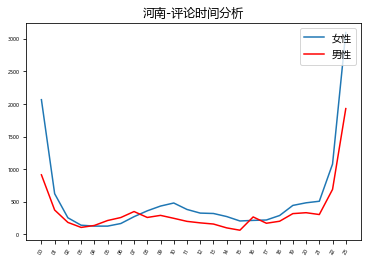

->->->->->->->->->->->->->->->->->->->

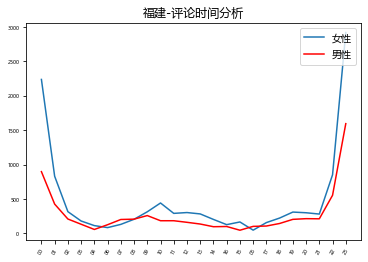

In [115]:
for c in cities[0:10]:
    city_gender_hour_plot(c)

### 多次评论

In [81]:
id_list = list(df['user_id'])
cnt = collections.Counter()
for id in id_list:
    cnt[id]+=1
#id_count = collections.Counter(id_list)
b50,b25,b5,b2 = 0,0,0,0
for id in cnt:
    if cnt[id]>50:
        b50+=1
    elif cnt[id]>25:
        b25+=1
    elif cnt[id]>5:
        b5+=1
    elif cnt[id]>1:
        b2+=1
print(b50,b25,b5,b2)

print(len(id_list),"->",len(cnt))

473 771 8969 86550
794507 -> 518492


In [41]:
def parse_info(input_txt):
    data = json.loads(input_txt)
    cards = data['data']['cards']
    account_info = {}
    person_info = {}
    for c11 in cards:
        if str(c11).find('账号信息')!=-1:
            account_info = c11
        elif str(c11).find('个人信息')!=-1:
            person_info = c11
    uid,reg_time,age,location = None,None,None,None
    for c41 in account_info['card_group']:
        if c41.get('item_name')=='注册时间':
            reg_time = c41['item_content']
    for c41 in person_info['card_group']:
        if c41.get('item_name')=='生日':
            age = c41['item_content']
        if c41.get('item_name')=='所在地':
            location=c41['item_content']
    return (uid,reg_time,age,location)

In [76]:
def age_parser(s:str):
    age = -1
    try:
        s = s.split(' ')[0]
        if len(s)>6:
            #d = parse(s.split(' ')[0]).date().strftime('%Y-%m-%d')
            d = datetime.datetime.strptime(s,'%Y-%m-%d')
            age = 2020-d.year
    except Exception as e:
        pass
        #print(e)
    return age

In [35]:
udf0 = pd.read_csv('ids-result-0.csv')

udf1 = pd.read_csv('ids-result-1.csv')

print(udf0.shape,udf1.shape)

rdf = pd.DataFrame(columns=['user_id','acc_age','age','location'])

udf0.drop_duplicates(inplace=True,keep='first')
udf1.drop_duplicates(inplace=True,keep='first')

print(udf0.shape,udf1.shape)

udf0.columns=['id','content']
udf1.columns=['id','content']

udf0.head()

udf = pd.concat([udf0,udf1])
udf.shape

udf.drop_duplicates(inplace=True,keep='first')
udf.shape

udf.head()

,id,content
0,1587194582,"{""ok"":1,""data"":{""cards"":[{""card_type"":11,""card..."
1,6912893061,"{""ok"":0,""msg"":""\u8fd9\u91cc\u8fd8\u6ca1\u6709\..."
2,6526702684,"{""ok"":1,""data"":{""cards"":[{""card_type"":11,""card..."
3,6221311844,"{""ok"":1,""data"":{""cards"":[{""card_type"":11,""card..."
4,5316214557,"{""ok"":1,""data"":{""cards"":[{""card_type"":11,""card..."


In [43]:
for i in range(udf.shape[0]):
    if i%10000==0:
        print('-> {} '.format(i),end='')
    try:
        info = parse_info(udf.iloc[i][1])
        rdf.loc[i]=(udf.iloc[i][0],age_parser(info[1]),age_parser(info[2]),str(info[3]).split(' ')[0])
    except:
        pass

-> 0 -> 10000 -> 20000 -> 30000 -> 40000 -> 50000 -> 60000 -> 70000 -> 80000 -> 90000 -> 100000 -> 110000 -> 120000 -> 130000 -> 140000 -> 150000 -> 160000 -> 170000 -> 180000 -> 190000 -> 200000 -> 210000 -> 220000 -> 230000 -> 240000 -> 250000 -> 260000 -> 270000 -> 280000 -> 290000 -> 300000 -> 310000 -> 320000 -> 330000 -> 340000 -> 350000 -> 360000 -> 370000 -> 380000 -> 390000 -> 400000 -> 410000 -> 420000 -> 430000 -> 440000 -> 450000 -> 460000 -> 470000 -> 480000 -> 490000 -> 500000 -> 510000 -> 520000 -> 530000 

In [44]:
rdf

,user_id,acc_age,age,location
0,1587194582,8,-1,上海
2,6526702684,2,21,其他
3,6221311844,3,-1,北京
4,5316214557,6,-1,其他
5,5156326275,6,32,上海
...,...,...,...,...
533526,3403523624,7,-1,江苏
533527,5337849761,6,-1,广西
533528,2623436257,8,21,其他
533529,1786789557,10,-1,其他


In [45]:
rdf.to_csv('user-clean-small-location-all.csv',index=False,encoding="utf_8_sig")

In [2]:
udf = pd.read_csv('user-clean-small-location-all.csv')
df = pd.read_csv('lwl-clean.csv')

In [3]:
mdf = pd.merge(udf,df,on='user_id',how='right')

In [19]:
odf = mdf[mdf['acc_age_x'].notna()]

In [23]:
odf = odf.drop(['acc_age_y','age_y','loc'],axis=1)

In [24]:
odf.to_csv('lwl-user-clean-2-small-location.csv',index=False,encoding="utf_8_sig")

In [26]:
odf = odf.sort_values(by='floor_nuumber',ascending=True)
odf.to_csv('lwl-user-clean-2-small-location-sorted.csv',index=False,encoding="utf_8_sig")

In [13]:
mdf['acc_age_x'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
852806     True
852807     True
852808     True
852809     True
852810     True
Name: acc_age_x, Length: 852811, dtype: bool

In [27]:
udf = pd.read_csv('user-clean-small-location-all.csv')
udf.shape

(531421, 4)

In [40]:
age_clean_df = udf[udf['age']!=-1]
age_clean_df = age_clean_df[age_clean_df['age']!=120]
age_clean_df = age_clean_df[age_clean_df['age']!=2]
age_clean_df.shape

(230267, 4)

In [45]:
acc_age_count = collections.Counter(udf['acc_age'])#.most_common(50)
age_count = collections.Counter(age_clean_df['age'])#.most_common(50)

In [57]:
aacd = dict(acc_age_count)
acc_age_count_d = sorted(list(aacd.items()),key=lambda x:x[0])
temp = acc_age_count_d.pop(0)

acd = dict(age_count)
age_count_d = sorted(list(acd.items()),key=lambda x:x[0])

In [60]:
age_key = []
age_val = []
acc_age_key = []
acc_age_val = []
for i in acc_age_count_d:
    acc_age_key.append(i[0])
    acc_age_val.append(i[1])
for i in age_count_d:
    if i[0] in range(15,56):
        age_key.append(i[0])
        age_val.append(i[1])

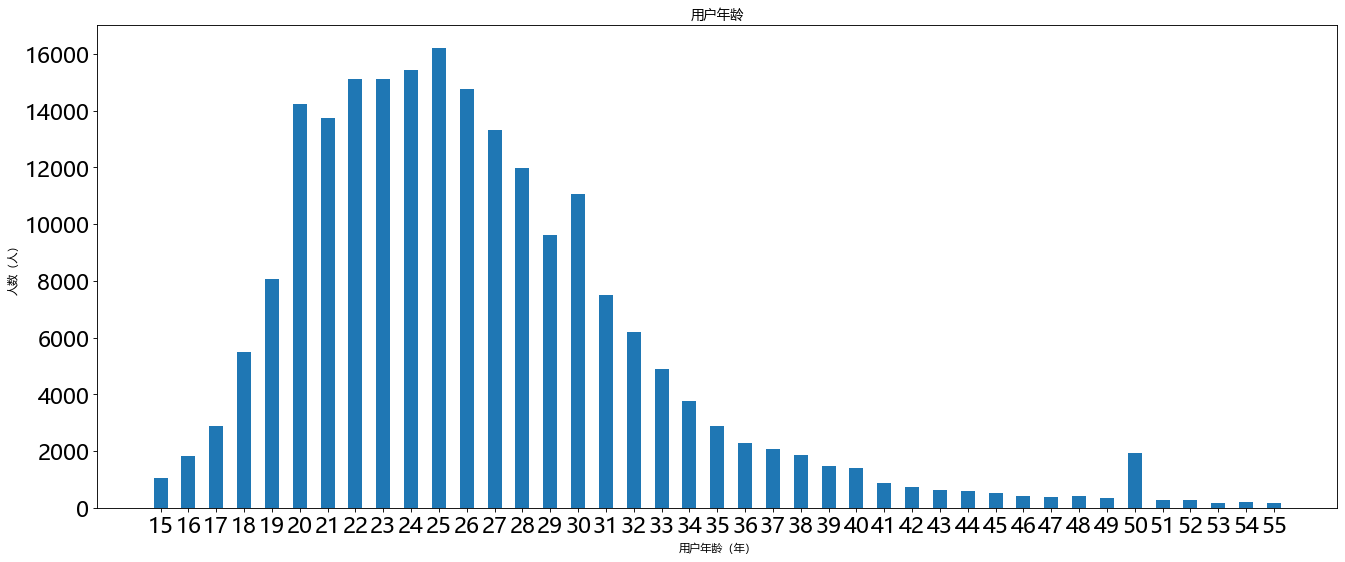

In [75]:
plt.figure(figsize=(20,8),dpi=80)
x = range(len(age_key))
plt.bar(x,age_val,width=0.5)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.xticks(x,age_key)
plt.xlabel('用户年龄（年）')
plt.ylabel('人数（人）')
plt.title('用户年龄')
plt.tick_params(labelsize=20)

plt.savefig('./img/user-age-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

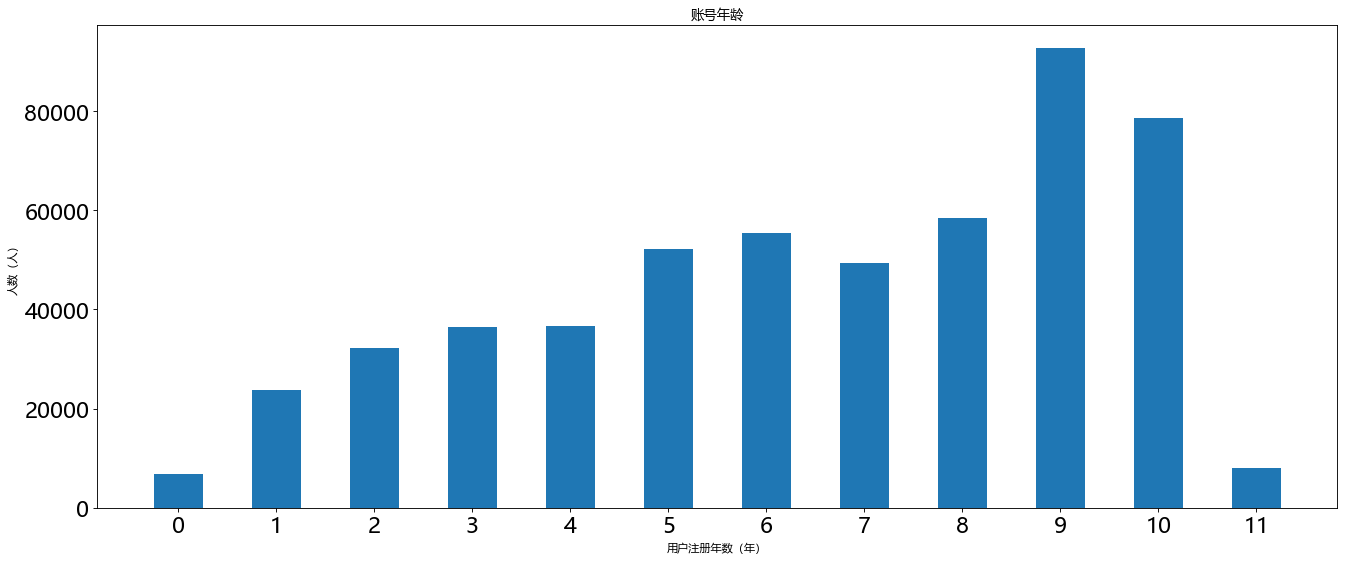

In [65]:
plt.figure(figsize=(20,8),dpi=80)
x = range(len(acc_age_key))
plt.bar(x,acc_age_val,width=0.5)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.xticks(x,acc_age_key)
plt.tick_params(labelsize=20)
plt.xlabel('用户注册年数（年）')
plt.ylabel('人数（人）')
plt.title('账号年龄')
plt.savefig('./img/user-acc-age-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

In [66]:
udf_s = udf[udf['location']!='其他']

udf_s = udf_s[udf_s['location'].str.contains('海外')!=True]

udf_s = udf_s[udf_s['location']!='None']
udf_s = udf_s[udf_s['location']!='香港中西区']
udf_s = udf_s[udf_s['location']!='贵州黔西南']
udf_s = udf_s[udf_s['location']!='重庆合川区']
udf_s = udf_s[udf_s['location']!='贵州黔东南']
udf_s = udf_s[udf_s['location']!='重庆永川区']
loc_count = collections.Counter(udf_s['location'])

loc_200 = loc_count.most_common(200)

In [132]:
loc_200[0][1]

[('广东', 45625), ('北京', 40857), ('江苏', 27597), ('上海', 25959), ('浙江', 25475)]

In [138]:
population = {
    '广东':11346,
    '山东':10047,
    '河南':9605,
    '四川':8341,
    '江苏':8050,
    '河北':7556,
    '湖南':6898,
    '安徽':6323,
    '湖北':5917,
    '浙江':5737,
    '广西':4926,
    '云南':4829,
    '江西':4647,
    '辽宁':4359,
    '福建':3941,
    '陕西':3864,
    '黑龙江':3773,
    '山西':3718,
    '贵州':3600,
    '重庆':3101,
    '吉林':2704,
    '甘肃':2637,
    '内蒙古':2534,
    '新疆':2486,
    '上海':2423,
    '北京':2154,
    '天津':1559,
    '海南':934,
    '宁夏':688,
    '青海':603,
    '西藏':343,
    '台湾':2316,
    '香港':709,
    '澳门':55
}

In [147]:
max = loc_200[0][1]
loc_200_r = []
ratio = max/1000
for i in loc_200:
    #i = list(i)
    #i[1] = i[1]/ratio
    loc_200_r.append([i[0],float(10*i[1]/population[i[0]])])#(float(i[1])/ratio)**0.7])
#print(loc_200_r)

In [148]:

geo = (
        Geo()
        .add_schema(maptype="china")
        .add("geo", loc_200_r)#`                              [list(z) for z in zip(["重庆酉阳土家族苗族自治县"], [888])])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(),
            title_opts=opts.TitleOpts(title="Geo-基本示例"),
        )
    )
geo.render_notebook()

c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [149]:
max = loc_200[0][1]
loc_200_r = []
ratio = max/1000
for i in loc_200:
    #i = list(i)
    #i[1] = i[1]/ratio
    loc_200_r.append([i[0],(float(i[1])/ratio)**0.7])
#print(loc_200_r)

In [150]:
geo = (
        Geo()
        .add_schema(maptype="china")
        .add("geo", loc_200_r)#`                              [list(z) for z in zip(["重庆酉阳土家族苗族自治县"], [888])])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(),
            title_opts=opts.TitleOpts(title="Geo-基本示例"),
        )
    )
geo.render_notebook()

c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
